A NN for fashion_mnist data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# for disabling gpu in tf
# import os
# os.environ["CUDA_VISIBLE_DEVICES"]="-1"
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
%matplotlib inline 
plt.style.use('dark_background')

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    print(1)
    try:
        for gpu in gpus:
            print(2)
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


In [ ]:
dataset = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = dataset.load_data()
for i in [x_train, y_train, x_test, y_test]:
    print(i.shape)
m = x_train.shape[0]
x_train = x_train.reshape(-1, 28,28,1)/255
x_test = x_test.reshape(-1, 28,28,1)/255

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Though the mnist data seem to be shuffled i will shuffle it again.

In [ ]:
valSize = 6000
permut = np.arange(x_test.shape[0])
x_test = x_test[permut]
y_test = y_test[permut]
x_test, x_val = x_test[valSize:], x_test[:valSize]
y_test, y_val = y_test[valSize:], y_test[:valSize]

In [ ]:
%load_ext tensorboard
!rm -rf ./logs/
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
model = keras.Sequential([
                        layers.Input((28,28,1)),
                        layers.Conv2D(16, kernel_size=(3,3), padding='same', activation='relu'),
                        # layers.BatchNormalization(),
                        layers.MaxPool2D(pool_size=(2,2), strides=2),

                        layers.Conv2D(32, kernel_size=(3,3), padding='same'),
                        # layers.BatchNormalization(),
                        layers.MaxPool2D(pool_size=(2,2), strides=2),
                        layers.Dropout(0.5),

                        layers.Flatten(),
                        layers.Dense(256, activation='relu'),
                        layers.Dropout(0.5),
                        layers.Dense(64, activation='relu'),
                        layers.Dropout(0.5),
                        layers.Dense(10,activation=None)
])
model.summary()

In [ ]:
alpha = 0.001
batchSize = 64
epochs = 10

In [ ]:
model.compile(
    optimizer= keras.optimizers.Adam(learning_rate=alpha),
    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
 history = model.fit(x_train, y_train, 
                    batch_size=batchSize, epochs=20,
                    validation_data=(x_val,y_val),
                    callbacks=[tensorboard_callback],
                    verbose=1,
                    initial_epoch=10
                     )

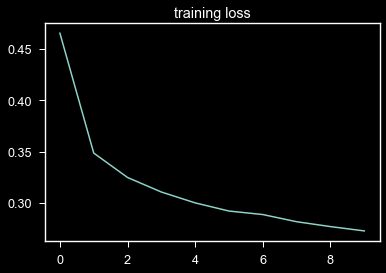

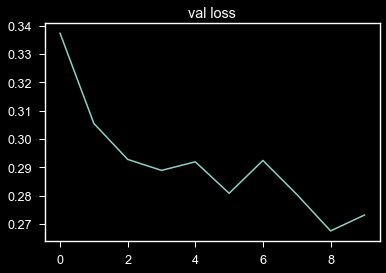

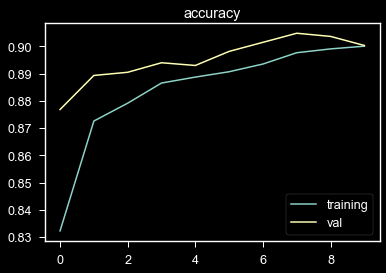

In [ ]:
historyDict = history.history
if 'loss' in historyDict:
    plt.plot(historyDict['loss'])
    plt.title('training loss')
    plt.show()
if 'val_loss' in historyDict:
    plt.plot(historyDict['val_loss'])
    plt.title('val loss')
    plt.show()
if 'accuracy' in historyDict:
    plt.plot(historyDict['accuracy'], label='training')
    if 'val_accuracy' in historyDict:
        plt.plot(historyDict['val_accuracy'], label='val')
    plt.legend()
    plt.title('accuracy')
    plt.show()

In [ ]:
model.evaluate(x_test, y_test)

125/125 [==============================] - 1s 10ms/step - loss: 0.1989 - accuracy: 0.9280


[0.19889821112155914, 0.9279999732971191]

In [ ]:
# !rm -rf logs/

In [ ]:
# 